In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r"C:\Users\anktr\3D Objects\Loan Prediction\train data.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001493,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [4]:
train.shape

(614, 13)

In [5]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
def status_ratio(x): 
    return x.value_counts(normalize=True)*100

In [7]:
print(status_ratio(train['Gender']),'\n')
print(status_ratio(train['Married']),'\n')
print(status_ratio(train['Self_Employed']),'\n')
print(status_ratio(train['Credit_History']),'\n')
print(status_ratio(train['Education']),'\n')
print(status_ratio(train['Property_Area']),'\n')
print(status_ratio(train['Loan_Status']))

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64 

Yes    65.139116
No     34.860884
Name: Married, dtype: float64 

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64 

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64 

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64 

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64 

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64


## DATA VISUALIZATION

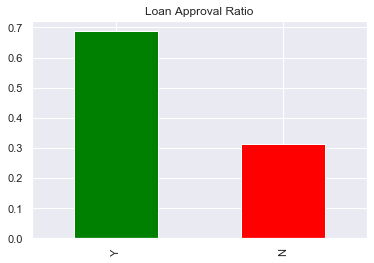

In [8]:
train['Loan_Status'].value_counts(normalize=True).plot.bar(title ='Loan Approval Ratio',color=['green','red'])

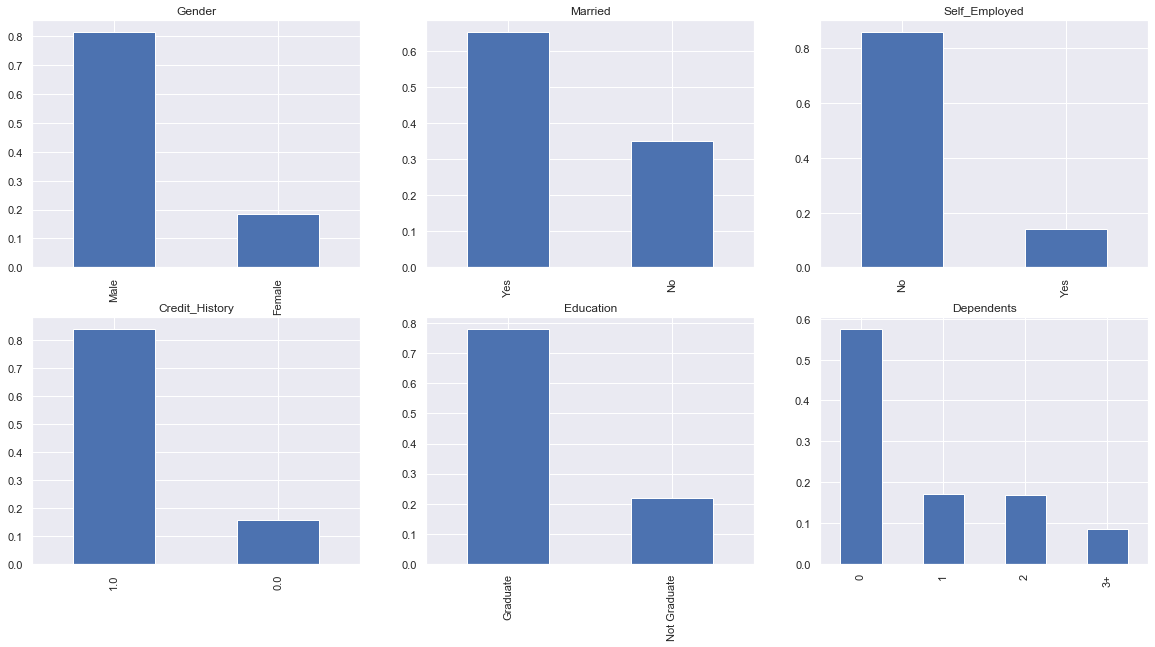

In [9]:
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(236)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependents')

plt.show()

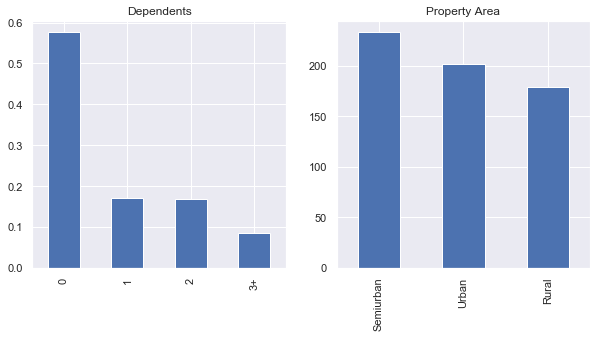

In [10]:
plt.subplot(221)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Dependents')

plt.subplot(222)
train['Property_Area'].value_counts().plot.bar(title='Property Area')

plt.show()

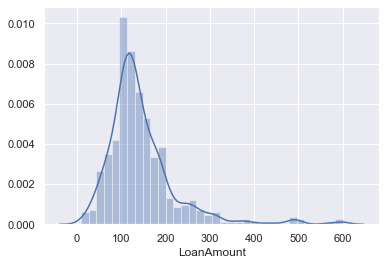

In [11]:
df = train.dropna()
sns.distplot(df['LoanAmount'])

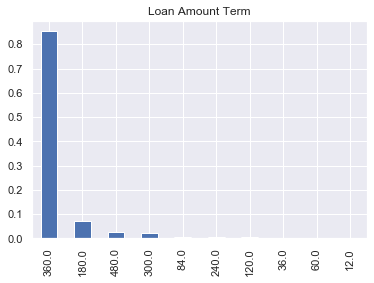

In [12]:
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan Amount Term')

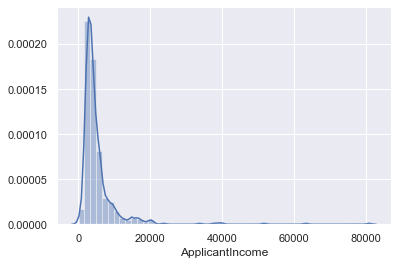

In [13]:
sns.distplot(train['ApplicantIncome'])

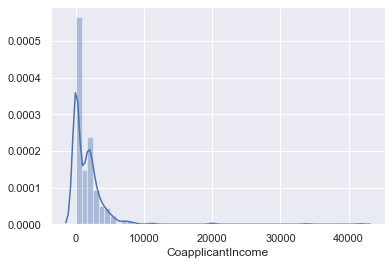

In [14]:
sns.distplot(train['CoapplicantIncome'])

## Correlation Heatmap

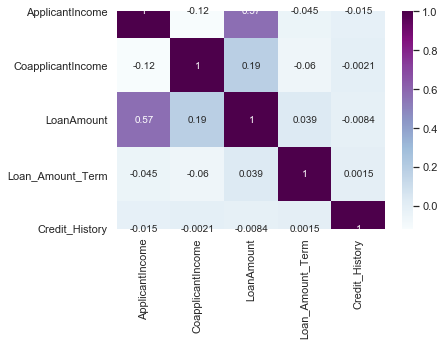

In [15]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix,annot=True,cmap='BuPu',vmax=1)

## DATA PREPROCESSING 

### MISSING VALUES ARE IN THE FOLLOWING COLUMNS : 
1. gender
2. married
3. dependents
4. self_employed
5. loan amount 
6. loan amount term 
7. credit histroy 

In [16]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
print('Unique Values in each feature:\n')
print(train['Gender'].unique(),'\n')
print(train['Married'].unique(),'\n')
print(train['Dependents'].unique(),'\n')
print(train['Self_Employed'].unique(),'\n')
print(train['Credit_History'].unique(),'\n')
print(train['Education'].unique())

Unique Values in each feature:

['Male' 'Female' nan] 

['No' 'Yes' nan] 

['0' '1' '2' '3+' nan] 

['No' 'Yes' nan] 

[ 1.  0. nan] 

['Graduate' 'Not Graduate']


#### Dealing with the noise associated with the above features: 

In [18]:
train['Dependents'] = train['Dependents'].replace(np.nan,0)
train['Self_Employed'] = train['Self_Employed'].replace(np.nan,'No')
train['Gender'] = train['Gender'].fillna(train['Gender'].dropna().mode().values[0])
train['Married'] = train['Married'].fillna(train['Married'].dropna().mode().values[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].dropna().mode().values[0])

In [19]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#####  Now we've got only two features left with noise: 'Loan Amount' & 'Loan Amount Term'

In [21]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace= True)

In [22]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
# Checking descriptive statistics: 
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,5,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001493,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,345,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


#### Since we have categorical data so, we will map them in numerical form

In [24]:
train['Married']  = train['Married'].map({'Yes':1,'No':0})

train['Gender'] = train['Gender'].map({'Male':1,'Female':0})

train['Education'] = train['Education'].map({'Graduate':1,'Not Graduate':0})

train['Self_Employed'] = train['Self_Employed'].map({'Yes':1,'No':0})

train['Property_Area'] = train['Property_Area'].map({'Urban':1,'Semiurban':2,'Rural':3})

train['Dependents'] =train['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

train['Loan_Status']  = train['Loan_Status'].map({'Y':1,'N':0})

In [25]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [26]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
train['Total Income'] = train['ApplicantIncome'] + train['ApplicantIncome']

In [28]:
train.drop(['Total Income'],axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,3,1
610,LP002979,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,3,1
611,LP002983,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,1,1


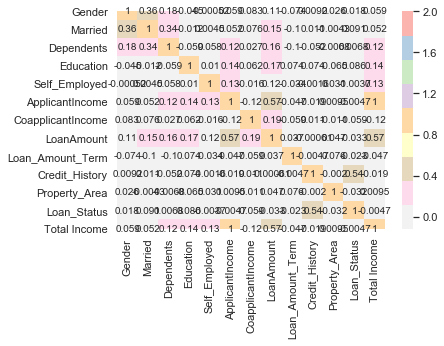

In [29]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix,annot=True,cmap= 'Pastel1_r',vmax=2)

In [30]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
Total Income          0
dtype: int64

In [31]:
train['Dependents'].unique()
train['Dependents'] = train['Dependents'].replace(np.nan,0)

In [32]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total Income         0
dtype: int64

## MODEL BUILDING

In [33]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total Income'],
      dtype='object')

In [35]:
train.drop(['Total Income'],axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,3,1
610,LP002979,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,3,1
611,LP002983,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [36]:
# Target variable: 'Loan_Status'
x=  train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].values
          
y=  train[['Loan_Status']].values

In [37]:
# Splitting data into train-test: 
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=300)

### Using Logistic Regression.

In [38]:
model1 =  LogisticRegression()

In [39]:
model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
model1.fit(x_train,y_train)

C:\Users\anktr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anktr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
model1.score(x_test, y_test)

0.8699186991869918

In [42]:
model2=  XGBClassifier()

In [43]:
model2

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [44]:
model2.fit(x_train, y_train)

C:\Users\anktr\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anktr\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
model2.score(x_test,y_test)

0.7967479674796748

In [46]:
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
model3.score(x_test, y_test)

0.6991869918699187

In [48]:
print('Score of different Algorithms: ')
print('1. Logistic Regression',model1.score(x_test,y_test), '\n'
    '2. XGBoostClassifier',model2.score(x_test,y_test))

Score of different Algorithms: 
1. Logistic Regression 0.8699186991869918 
2. XGBoostClassifier 0.7967479674796748


## We see the LOGISTIC REGESSION works well with a score of 0.86 ! 

In [49]:
predicted_status1 =  model1.predict(x_test)

In [81]:
predicted_status1.shape

(123,)

In [51]:
predicted_status2 =  model2.predict(x_test)

In [82]:
predicted_status2.shape

(123,)

In [53]:
test = pd.read_csv(r"C:\Users\anktr\3D Objects\Loan Prediction\test-data.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [54]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [55]:
test['Dependents']=test['Dependents'].replace(np.nan,0)
test['Self_Employed'] = test['Self_Employed'].replace(np.nan,'No')
test['LoanAmount'] = test['LoanAmount'].replace(np.nan,test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].replace(np.nan,360)
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].dropna().mode().values[0])
test['Gender'] = test['Gender'].fillna(test['Gender'].dropna().mode().values[0])

In [56]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [57]:
test['Married']  = test['Married'].map({'Yes':1,'No':0})

test['Gender'] = test['Gender'].map({'Male':1,'Female':0})

test['Education'] = test['Education'].map({'Graduate':1,'Not Graduate':0})

test['Self_Employed'] = test['Self_Employed'].map({'Yes':1,'No':0})

test['Property_Area'] = test['Property_Area'].map({'Urban':1,'Semiurban':2,'Rural':3})

test['Dependents'] =test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [58]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0.0,1,0,5720,0,110.0,360.0,1.0,1
1,LP001022,1,1,1.0,1,0,3076,1500,126.0,360.0,1.0,1
2,LP001031,1,1,2.0,1,0,5000,1800,208.0,360.0,1.0,1
3,LP001035,1,1,2.0,1,0,2340,2546,100.0,360.0,1.0,1
4,LP001051,1,0,0.0,0,0,3276,0,78.0,360.0,1.0,1


In [84]:
final_test = test.copy()

In [59]:
model_predict = model1.predict(x_train)

In [60]:
model_predict

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [61]:
from sklearn import metrics
metrics.accuracy_score(y_train,model_predict)

0.7963340122199593

print(metrics.confusion_matrix(y_train, model_predict))

from sklearn.metrics import precision_score
precision_score(y_train, model_predict, average=None)

print(metrics.classification_report(y_train, model_predict))

In [85]:
final_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [86]:
xx = final_test[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].values

In [64]:
#test['Loan_Status']  = model1.predict(xx)

In [87]:
final_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [88]:
final_test['Dependents']=test['Dependents'].replace(np.nan,0)

In [89]:
final_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [97]:
pred = model1.predict(xx)

In [98]:
final_test['Loan_Status'] = model1.predict(xx) 

In [99]:
final_test.shape

(367, 13)

In [100]:
final_test['Loan_Status'] = final_test['Loan_Status'].map({1:'Yes',0:'No'}).astype(str)

In [101]:
final_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0.0,1,0,5720,0,110.0,360.0,1.0,1,Yes
1,LP001022,1,1,1.0,1,0,3076,1500,126.0,360.0,1.0,1,Yes
2,LP001031,1,1,2.0,1,0,5000,1800,208.0,360.0,1.0,1,Yes
3,LP001035,1,1,2.0,1,0,2340,2546,100.0,360.0,1.0,1,Yes
4,LP001051,1,0,0.0,0,0,3276,0,78.0,360.0,1.0,1,Yes


In [102]:
logistic_submission = pd.read_csv(r"C:\Users\anktr\3D Objects\Loan Prediction\sample-submission.csv")

In [103]:
logistic_submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [104]:
logistic_submission['Loan_Status'] = pred

In [107]:
logistic_submission['Loan_Status'].map({1:'Yes',0:'No'})

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
362    Yes
363    Yes
364    Yes
365    Yes
366    Yes
Name: Loan_Status, Length: 367, dtype: object

In [109]:
logistic_submission['Loan_Status'].value_counts(normalize=True)

1    0.836512
0    0.163488
Name: Loan_Status, dtype: float64

In [110]:
logistic_submission.to_csv(r"C:\Users\anktr\3D Objects\Loan Prediction\sample-submission.csv",index=False)

In [112]:
logistic_submission['Loan_Status'].unique()

array([1, 0], dtype=int64)